## Convnet model 생성

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

</br>

___
## 데이터 전처리 및 훈련

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [8]:
test_imgs.shape

(10000, 28, 28)

In [9]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
train_imgs = train_imgs.astype('float32') / 255

test_imgs = test_imgs.reshape((10000, 28, 28, 1))
test_imgs = test_imgs.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_imgs, train_labels, 
         epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1844 - acc: 0.9432
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0484 - acc: 0.9844
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0324 - acc: 0.9904
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0241 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0188 - acc: 0.9942


In [12]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

print('test_loss : ',test_loss)
print('test_accuracy : ',test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.0484 - acc: 0.9867
test_loss :  0.048398507911438356
test_accuracy :  0.9867


</br>

___
## convnet 으로 훈련시키기


***

In [13]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train/'

base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(valid_dir)
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(valid_cats_dir)
os.mkdir(valid_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir)
    shutil.copy(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copy(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir)
    shutil.copy(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copy(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dst)

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1. / 255) # image의 scale 0~1 로 조정
valid_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), # 모든 image들을 (150 x 150) 으로 조정
                                                    batch_size = 20,
                                                    class_mode = 'binary') # binary_crossentropy 를 사용하기 때문에 이진 레이블 필요.

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('batch data size : ', data_batch.shape)
    print('batch label size : ', labels_batch.shape)
    break

batch data size :  (20, 150, 150, 3)
batch label size :  (20,)


In [20]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = valid_generator,
                              validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 14s 140ms/step - loss: 0.6919 - acc: 0.5395 - val_loss: 0.6725 - val_acc: 0.5550
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6509 - acc: 0.6190 - val_loss: 0.6608 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6140 - acc: 0.6660 - val_loss: 0.6200 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5731 - acc: 0.7095 - val_loss: 0.6607 - val_acc: 0.6150
Epoch 5/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5359 - acc: 0.7305 - val_loss: 0.5849 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5014 - acc: 0.7605 - val_loss: 0.6103 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 6s 56ms/step - loss: 0.4698 - acc: 0.7775 - val_loss: 0.6188 - val_acc: 0.6780
Epoch 8/30
100/100 [==============================] - 6s 56ms/step 

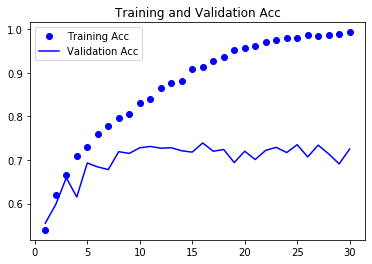

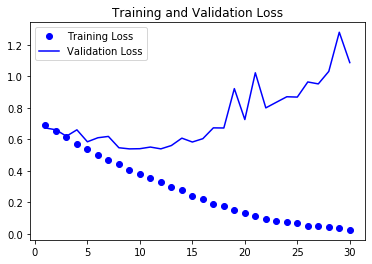

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

</br>

___
## Data Augmentation
___

In [23]:
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

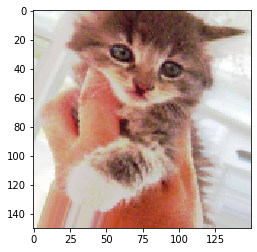

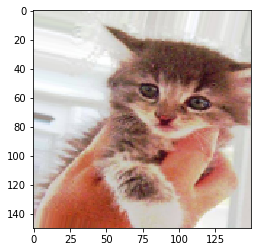

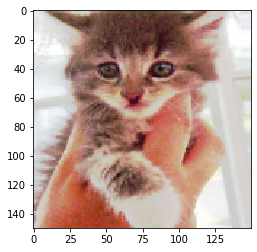

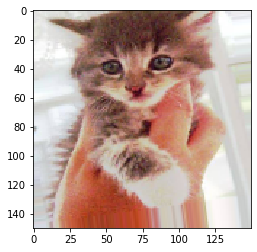

In [24]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break

plt.show()

In [25]:
model_ = models.Sequential()
model_.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model_.add(layers.MaxPooling2D((2, 2)))
model_.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_.add(layers.MaxPooling2D((2, 2)))
model_.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_.add(layers.MaxPooling2D((2, 2)))
model_.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_.add(layers.MaxPooling2D((2, 2)))

model_.add(layers.Flatten())
model_.add(layers.Dropout(0.5))
model_.add(layers.Dense(512, activation='relu'))
model_.add(layers.Dense(1, activation='sigmoid'))

model_.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [32]:
model_.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 32,
                                                   class_mode='binary')

valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

history = model_.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data= valid_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6927 - acc: 0.5223 - val_loss: 0.7114 - val_acc: 0.4962
Epoch 2/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6798 - acc: 0.5587 - val_loss: 0.8036 - val_acc: 0.5044
Epoch 3/100
100/100 [==============================] - 18s 180ms/step - loss: 0.6752 - acc: 0.5641 - val_loss: 0.6483 - val_acc: 0.6282
Epoch 4/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6634 - acc: 0.5955 - val_loss: 0.6349 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6402 - acc: 0.6256 - val_loss: 0.6101 - val_acc: 0.6491
Epoch 6/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6219 - acc: 0.6480 - val_loss: 0.5968 - val_acc: 0.6669
Epoch 7/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6122 - acc: 0.6670 -

In [34]:
model.save('cats_and_dogs_small_2.h5')

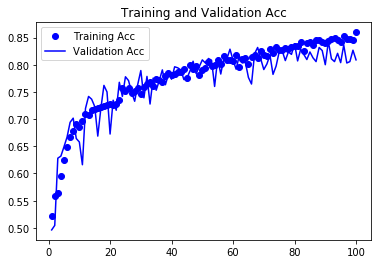

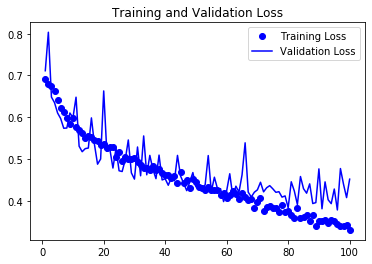

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

</br>

***
## Use pretrained Convnet - VGG,,,
___

In [36]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

</br>

***
## data augmentation 없는 빠른 특성 추출

+ ImageDataGenerator를 사용하여 image와 label을 Numpy array로 추출한다.
+ conv_base 모델의 predict method를 사용하여, 해당 image에 대해 features를 추출한다.

In [40]:
import os
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small/'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale= 1./255)

batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                           class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        
        i+=1
        if i * batch_size >= sample_count:
            break
    
    return features, labels

In [41]:
train_features, train_labels = extract_features(train_dir, 2000)
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [45]:
print(train_features.shape)
print(valid_features.shape)
print(test_features.shape)

(2000, 8192)
(1000, 4, 4, 512)
(1000, 4, 4, 512)


### FLATTEN

In [46]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
valid_features = np.reshape(valid_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [47]:
print(train_features.shape)
print(valid_features.shape)
print(test_features.shape)

(2000, 8192)
(1000, 8192)
(1000, 8192)


In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size = 20,
                   validation_data = (valid_features, valid_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 310us/sample - loss: 0.6104 - acc: 0.6705 - val_loss: 0.4400 - val_acc: 0.8200
Epoch 2/30
2000/2000 [==============================] - 0s 210us/sample - loss: 0.4263 - acc: 0.8030 - val_loss: 0.3562 - val_acc: 0.8680
Epoch 3/30
2000/2000 [==============================] - 0s 202us/sample - loss: 0.3599 - acc: 0.8405 - val_loss: 0.3236 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 0s 205us/sample - loss: 0.3021 - acc: 0.8755 - val_loss: 0.2898 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 0s 206us/sample - loss: 0.2908 - acc: 0.8705 - val_loss: 0.2761 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 0s 209us/sample - loss: 0.2568 - acc: 0.9015 - val_loss: 0.2668 - val_acc: 0.8980
Epoch 7/30
2000/2000 [==============================] - 0s 211us/sample - loss: 0.2401 - acc: 0.9085 - val_loss: 0.2559 - va

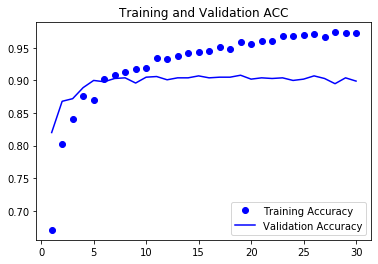

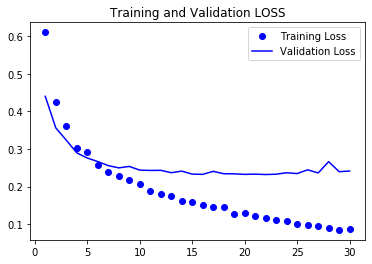

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation ACC')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation LOSS')
plt.legend()

</br>

***
## data augmentation 사용한 feature extraction

+ ImageDataGenerator를 사용하여 image와 label을 Numpy array로 추출한다.
+ conv_base 모델의 predict method를 사용하여, 해당 image에 대해 features를 추출한다.

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()                    

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
print(len(model.trainable_weights))

conv_base.trainable = False

print(len(model.trainable_weights))

30
4


In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode= 'binary')

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss= 'binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs = 30,
                             validation_data=valid_generator,
                             validation_steps=50,
                             verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 13s - loss: 0.5486 - acc: 0.7350 - val_loss: 0.4101 - val_acc: 0.8500
Epoch 2/30
100/100 - 11s - loss: 0.4240 - acc: 0.8260 - val_loss: 0.3434 - val_acc: 0.8650
Epoch 3/30
100/100 - 11s - loss: 0.3724 - acc: 0.8460 - val_loss: 0.3039 - val_acc: 0.8880
Epoch 4/30
100/100 - 11s - loss: 0.3505 - acc: 0.8510 - val_loss: 0.2866 - val_acc: 0.8950
Epoch 5/30
100/100 - 11s - loss: 0.3223 - acc: 0.8655 - val_loss: 0.2710 - val_acc: 0.8960
Epoch 6/30
100/100 - 11s - loss: 0.3172 - acc: 0.8610 - val_loss: 0.2716 - val_acc: 0.8860
Epoch 7/30
100/100 - 11s - loss: 0.2977 - acc: 0.8705 - val_loss: 0.2544 - val_acc: 0.9010
Epoch 8/30
100/100 - 11s - loss: 0.2853 - acc: 0.8800 - val_loss: 0.2550 - val_acc: 0.8990
Epoch 9/30
100/100 - 11s - loss: 0.2863 - acc: 0.8815 - val_loss: 0.2492 - val_acc: 0.9010
Epoch 10/30
100/100 - 11s - loss: 0.2842 - acc: 0.8775 - val_loss: 0.2682 - val_acc: 0.8820
Epoch

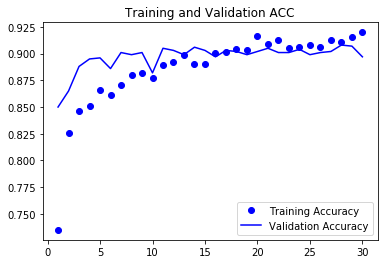

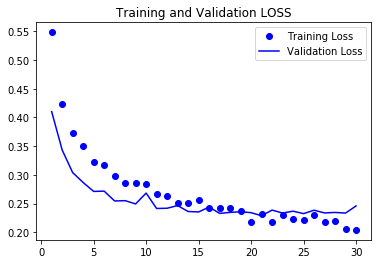

In [58]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation ACC')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation LOSS')
plt.legend()

plt.show()

### Fine Tuning 

: pre-trained network를 가져와서 새로운 classifier를 추가하여 훈련하거나, base network를 freezing 시키고 최상위 2~3개층만 해제하여 훈련 시키는 방법.

1. pre-trained base-network 위에 새로운 network(classifier) 추가
2. base-network를 freeze
3. 새로 추가한 network train
4. base-network 의 일부 층(최상위 2~3층)의 freeze를 해제.
5. freeze를 해제한 층과 새로 추가한 network를 함께 훈련

#### **Learning-rate을 기존 훈련보다 낮추는 이유**
: fine-tuning 하는 layer들에서 학습된 표현을 조금씩 수정하기 위해서.

- learning rate 이 너무 크면 기존에 학습된 표현에 악영향..줄수 있음

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    
    if set_trainable:
        layer.trainable = True
    
    else:
        layer.trainable = False
    